In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
dataAGF  = pd.read_excel('Data_Sets_Chapter_2_data_AGF.xls', header = 1)
dataKris = pd.read_excel('Data_Sets_Chapter_2_data_KrispyKreme.xls', header = 1)
dataKK   = pd.read_excel('Data_Sets_Chapter_2_raw data_KrispyKreme.xls', header = 1)

In [3]:
dataAGF.rename(columns = 
               lambda x:x.replace(' (pt)', '').replace(' (|qt|)', '').replace(' (bt)', '').replace(' (at)', '').replace(' (dt)', '').replace('(bt)', '').strip(), 
               inplace = True)
dataKris.rename(columns = 
               lambda x:x.replace(' (pt)', '').replace(' (|qt|)', '').replace(' (bt)', '').replace(' (at)', '').replace(' (dt)', '').replace('(bt)', '').strip(), 
               inplace = True)
dataKK.rename(columns = 
               lambda x:x.replace(' (pt)', '').replace(' (|qt|)', '').replace(' (bt)', '').replace(' (at)', '').replace(' (dt)', '').replace('(bt)', '').strip(), 
               inplace = True)

# Exercise1: AGF Spreads

In [4]:
timeRef = dt.time(9, 0, 0)

In [5]:
def calcTimeInterval(time, timeRef = timeRef, interval = 30):
    return int(((time.hour * 60 + time.minute) - (timeRef.hour * 60 + timeRef.minute))/interval)

def addSpreads(df):
    df['Quoted_Spread'] = df['Ask'] - df['Bid']
    df['MidPrice'] = (df['Ask'] + df['Bid'])/2
    df['Relative_Spread'] = df['Quoted_Spread']/df['MidPrice']
    df['log_Spread'] = np.log(df['Ask']/df['Bid'])
    
    df['Quoted_Half_Spread'] = df['Quoted_Spread']/2
    
    if 'Direction' in df.columns:
        df['Effective_Spread'] = (df['Price'] - df['MidPrice']) * df['Direction']
    
    return df

In [6]:
dataAGF_Processed = addSpreads(dataAGF)
dataAGF_Processed['TimeInterval'] = dataAGF_Processed['Time'].apply(lambda x:calcTimeInterval(x, timeRef))
dataAGF_Processed.set_index('Time', inplace = True)

In [7]:
dataAGF_Processed.head()

,Trade Size,Price,Direction,Bid,Ask,Quoted_Spread,MidPrice,Relative_Spread,log_Spread,Quoted_Half_Spread,Effective_Spread,TimeInterval
Time,,,,,,,,,,,,
09:06:04,20,66.7000,-1,66.90,67.00,0.10,66.950,0.001494,0.001494,0.050,0.2500,0
09:06:11,25,66.6360,-1,66.65,66.70,0.05,66.675,0.000750,0.000750,0.025,0.0390,0
09:06:26,18,66.6000,-1,66.60,66.65,0.05,66.625,0.000750,0.000750,0.025,0.0250,0
09:07:18,273,66.4163,-1,66.50,66.55,0.05,66.525,0.000752,0.000752,0.025,0.1087,0
09:07:36,27,66.5500,1,66.15,66.55,0.40,66.350,0.006029,0.006029,0.200,0.2000,0


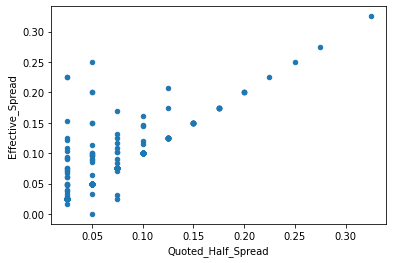

In [8]:
dataAGF_Processed[['Quoted_Half_Spread', 'Effective_Spread']].plot.scatter('Quoted_Half_Spread', 'Effective_Spread')

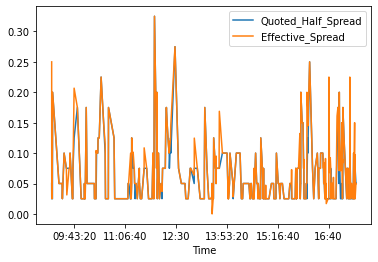

In [9]:
dataAGF_Processed[['Quoted_Half_Spread', 'Effective_Spread']].plot()

Effective spreae is sometimes higher than quoted half spread, due to adverse market move after a trade execution

##### Quoted spread average

In [10]:
dataAGF_Processed.head()

,Trade Size,Price,Direction,Bid,Ask,Quoted_Spread,MidPrice,Relative_Spread,log_Spread,Quoted_Half_Spread,Effective_Spread,TimeInterval
Time,,,,,,,,,,,,
09:06:04,20,66.7000,-1,66.90,67.00,0.10,66.950,0.001494,0.001494,0.050,0.2500,0
09:06:11,25,66.6360,-1,66.65,66.70,0.05,66.675,0.000750,0.000750,0.025,0.0390,0
09:06:26,18,66.6000,-1,66.60,66.65,0.05,66.625,0.000750,0.000750,0.025,0.0250,0
09:07:18,273,66.4163,-1,66.50,66.55,0.05,66.525,0.000752,0.000752,0.025,0.1087,0
09:07:36,27,66.5500,1,66.15,66.55,0.40,66.350,0.006029,0.006029,0.200,0.2000,0


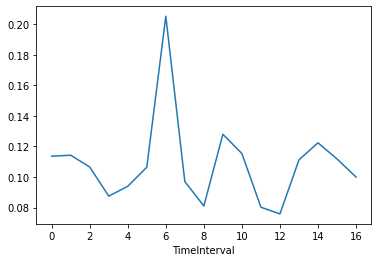

In [11]:
dataAGF_Processed.set_index('TimeInterval').Quoted_Spread.mean(level = 'TimeInterval').plot()

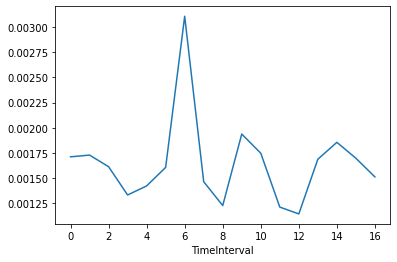

In [12]:
dataAGF_Processed.set_index('TimeInterval').Relative_Spread.mean(level = 'TimeInterval').plot()

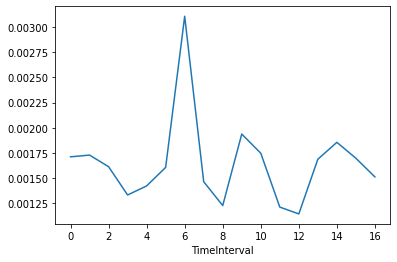

In [13]:
dataAGF_Processed.set_index('TimeInterval').log_Spread.mean(level = 'TimeInterval').plot()

##### VWAP prices

In [14]:
def VWAP(df):
    return (df.Price * df['Trade Size']).sum() / df['Trade Size'].sum()

In [15]:
dataAGF_Processed_buyer  = dataAGF_Processed[dataAGF_Processed.Direction == 1]

dataAGF_Processed_seller = dataAGF_Processed[dataAGF_Processed.Direction == -1]

In [16]:
VWAP(dataAGF_Processed_buyer), VWAP(dataAGF_Processed_seller)

(66.0926499559618, 65.88885986691075)

9:00 - 12:00

In [17]:
df_buy  = dataAGF_Processed_buyer[dataAGF_Processed_buyer.index < dt.time(12, 0, 0)]
df_sell = dataAGF_Processed_seller[dataAGF_Processed_seller.index < dt.time(12, 0, 0)] 

VWAP(df_buy), VWAP(df_sell)

(66.09206370221254, 65.90238640544808)

12:00 - 15:00

In [18]:
df_buy  = dataAGF_Processed_buyer[(dataAGF_Processed_buyer.index < dt.time(15, 0, 0)) & 
                                  (dataAGF_Processed_buyer.index >= dt.time(12, 0, 0))]
df_sell = dataAGF_Processed_seller[(dataAGF_Processed_seller.index < dt.time(15, 0, 0)) & 
                                   (dataAGF_Processed_seller.index >= dt.time(12, 0, 0))] 

VWAP(df_buy), VWAP(df_sell)

(66.10385337566223, 65.99628722148495)

15:00 - 17:30

In [19]:
df_buy  = dataAGF_Processed_buyer[(dataAGF_Processed_buyer.index < dt.time(17, 30, 0)) & 
                                  (dataAGF_Processed_buyer.index >= dt.time(15, 0, 0))]
df_sell = dataAGF_Processed_seller[(dataAGF_Processed_seller.index < dt.time(17, 30, 0)) & 
                                   (dataAGF_Processed_seller.index >= dt.time(15, 0, 0))] 

VWAP(df_buy), VWAP(df_sell)

(66.08637827551495, 65.85991259218805)

##### Roll's measure

In absolute terms

In [20]:
dataAGF_Processed['Return_t'] = dataAGF_Processed['Price'].diff().shift(-1)
dataAGF_Processed['Return_t+1'] = dataAGF_Processed['Price'].diff()

In [21]:
spreadRoll = 2 * np.sqrt(-dataAGF_Processed[['Return_t', 'Return_t+1']].cov().iloc[0, 1])

In [22]:
spreadRoll

0.10516322321707215

In [23]:
dataAGF_Processed.Quoted_Spread.mean(), dataAGF_Processed.Effective_Spread.mean() * 2

(0.10616570327552977, 0.11833903660886351)

Roll's measure tend to slightly underestimate the true spread. It stays very close to the average quoted spread

##### Regression analysis ti estimate price impact $\lambda$

In [24]:
dataAGF_Processed['Interval_15'] = dataAGF_Processed.index.map(lambda x:calcTimeInterval(x, timeRef, 15))
dataAGF_Processed['SignedFlow'] = dataAGF_Processed['Direction'] * dataAGF_Processed['Trade Size']

In [25]:
mid_price_change = pd.Series([dataAGF_Processed[dataAGF_Processed.Interval_15 == i].MidPrice[-1] - dataAGF_Processed[dataAGF_Processed.Interval_15 == i].MidPrice[0]
                    for i in dataAGF_Processed.Interval_15.unique()], 
                             index = dataAGF_Processed.Interval_15.unique(), name = 'MidPridceChange').to_frame()
signedOrderVolume = dataAGF_Processed.set_index('Interval_15').SignedFlow.sum(level = 'Interval_15').to_frame()


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = False)
model.fit(signedOrderVolume, mid_price_change)

LinearRegression(fit_intercept=False)

In [27]:
model.coef_, model.score(mid_price_change, signedOrderVolume)

(array([[1.54672593e-05]]), -0.025272479976057083)

Conclusion: the $\lambda$ parameter from regression is almost 0, with near-0 R-square score

# Exercise2: Inferring trade direction from KK data

In [28]:
dataKris.head()

,Time,Trade Size,Price,Direction,Bid,Ask
0,09:30:02,500,2.99,-1,2.81,3.24
1,09:30:02,500,2.99,-1,2.81,3.24
2,09:32:28,2400,3.03,1,2.88,3.15
3,09:33:35,100,3.03,1,3.01,3.03
4,09:33:38,100,3.02,1,3.01,3.03


In [29]:
dataKris_Processed = addSpreads(dataKris)
dataKris_Processed['TimeInterval'] = dataKris['Time'].apply(lambda x:calcTimeInterval(x, timeRef))
dataKris_Processed.set_index('Time', inplace = True)

### 1- Spreads

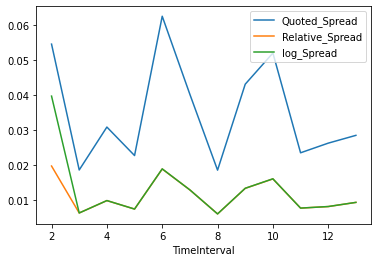

In [31]:
dataKris_Processed.groupby(['TimeInterval']).mean()[['Quoted_Spread', 'Relative_Spread', 'log_Spread']].iloc[1:].plot()

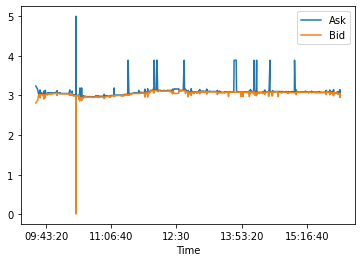

In [32]:
dataKris_Processed[['Ask', 'Bid']].plot()

### 2- Lee-Ready algorithm

In [33]:
def leeReadyDirection(price, lastAsk, lastBid):
    return int(np.abs(price - lastAsk) <= np.abs(price - lastBid)) - int(np.abs(price - lastAsk) > np.abs(price - lastBid))

In [34]:
dataKris_Processed['Direction_LR'] = dataKris_Processed.apply(lambda x:leeReadyDirection(x['Price'],
                                                                                        x['Ask'], 
                                                                                        x['Bid']), axis = 1)

In [35]:
np.sum(dataKris_Processed['Direction'] == dataKris_Processed['Direction_LR'])/len(dataKris)

0.9255172413793104

Lee-Ready achieves 92.6% accuracy

# Exercise3: Further empirical cost measurement

Omitted, same as exercise 1

# Exercise4: Computing spreads

In [36]:
ask = 102.31
bid = 99.50

s0 = ask - bid
m0 = (ask + bid)/2

s0, s0/m0

(2.8100000000000023, 0.027847975818839524)

10:30

In [37]:
ask = 102.55
bid = 100.02

s0 = ask - bid
m0 = (ask + bid)/2

s0, s0/m0

(2.530000000000001, 0.02497901959816361)

Effective spread at 9:30 after execution of 102.76 buy order

In [38]:
ask = 102.31
bid = 99.50

s0 = ask - bid
m0 = (ask + bid)/2


(102.76 - m0), (102.76 - m0)/m0, ask - m0

(1.855000000000004, 0.01838362816510583, 1.4050000000000011)

Realized spread between 9:30 - 10:30

In [39]:
ask = 102.55
bid = 100.02

s0 = ask - bid
m0 = (ask + bid)/2

(102.76 - m0)

1.4750000000000085